# Image-Based Multi-Digit Extraction and Classification

This notebook uses the method of Histogram of Oriented Gradients to recognise the multiple digits in a single image by extracting the contours.

In [1]:
# Imports
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

from tensorflow.keras.datasets import mnist
from digit_extraction import DigitExtraction
from models_HOG import HOG_Classifier
from data_generator import load_data

import warnings
warnings.filterwarnings('ignore')

## Load the MNIST Training Data

In [2]:
(X_train, y_train), (_, _) = mnist.load_data()
X_train, y_train = X_train[::8], y_train[::8]

## HOG Model using KNN and SVM

In [3]:
# Training the KNN based model
knn_model = HOG_Classifier('KNN', k = 3)
training_start_time = time.time()
knn_model.fit(X_train, y_train)
print(f"Time required to train the model: {time.time() - training_start_time:.2f} s")

Time required to train the model: 35.07 s


In [4]:
# Training the SVM based model
svm_model = HOG_Classifier('SVM', C = 1)
training_start_time = time.time()
svm_model.fit(X_train, y_train)
print(f"Time required to train the model: {time.time() - training_start_time:.2f} s")

Time required to train the model: 45.11 s


## Testing on Sample Images

In [6]:
test_img = cv2.imread("test_images\\test_image1.png")
d = DigitExtraction(test_img, pad_value = 0)
digits = d.extract_digits()

Prediction Time: 0.95


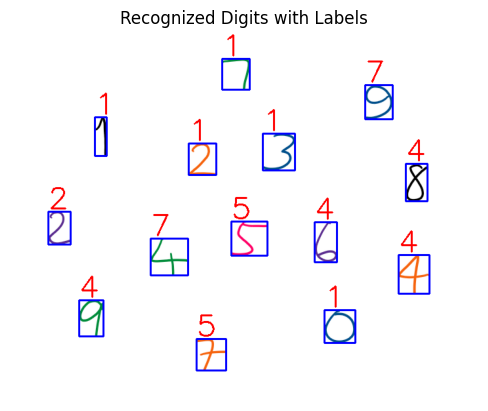

In [7]:
start = time.time()
knn_preds = knn_model.predict(digits)
print(f"Prediction Time: {time.time() - start:.2f}")
d.show_recognized_digits(knn_preds)

Prediction Time: 0.12


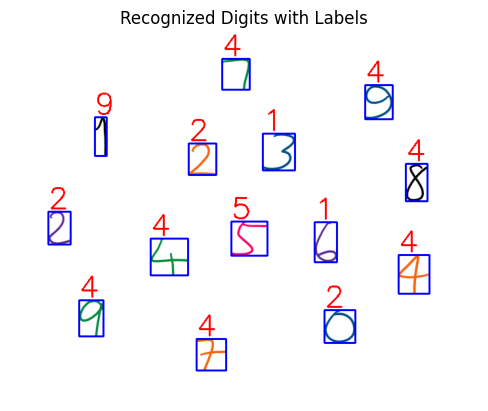

In [8]:
start = time.time()
svm_preds = svm_model.predict(digits)
print(f"Prediction Time: {time.time() - start:.2f}")
d.show_recognized_digits(svm_preds)

## Modification of Training Data

In [2]:
X_train, y_train = load_data()

In [3]:
# Training the KNN based model
knn_model = HOG_Classifier('KNN', k = 3)
training_start_time = time.time()
knn_model.fit(X_train, y_train)
print(f"Time required to train the model: {time.time() - training_start_time:.2f} s")

Time required to train the model: 1.28 s


In [4]:
# Training the SVM based model
svm_model = HOG_Classifier('SVM', C = 1)
training_start_time = time.time()
svm_model.fit(X_train, y_train)
print(f"Time required to train the model: {time.time() - training_start_time:.2f} s")

Time required to train the model: 1.33 s


## Testing on Sample Images

Prediction Time: 0.56


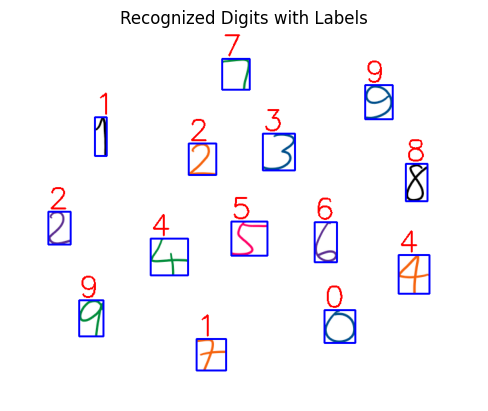

In [7]:
start = time.time()
knn_preds = knn_model.predict(digits)
print(f"Prediction Time: {time.time() - start:.2f}")
d.show_recognized_digits(knn_preds)

Prediction Time: 0.11


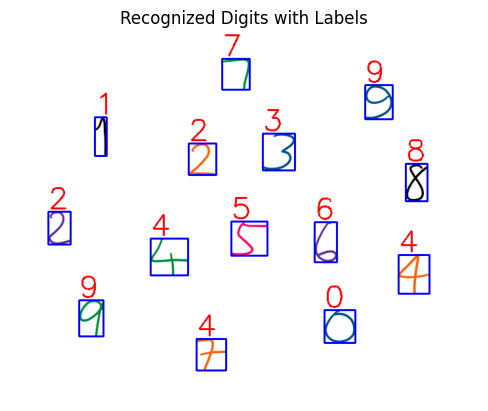

In [8]:
start = time.time()
svm_preds = svm_model.predict(digits)
print(f"Prediction Time: {time.time() - start:.2f}")
d.show_recognized_digits(svm_preds)